In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv('ph-data.csv')
dataset

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='blue'>

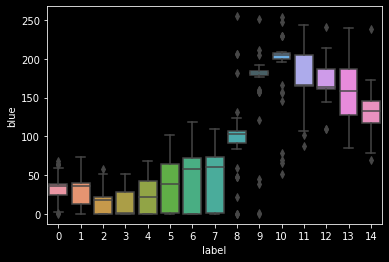

In [3]:
sns.boxplot('label','blue',data=dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


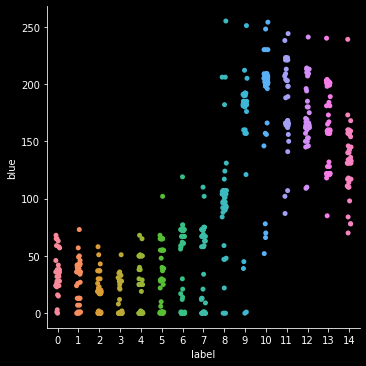

In [4]:
sns.catplot('label','blue',data=dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='blue'>

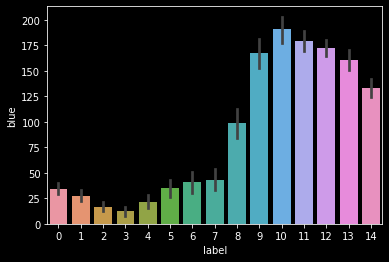

In [5]:
sns.barplot('label','blue',data=dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='red'>

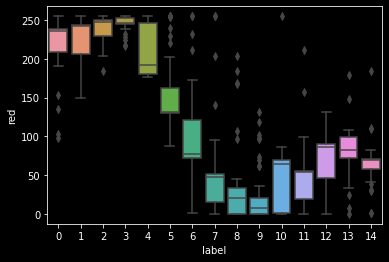

In [6]:
sns.boxplot('label','red',data=dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='red'>

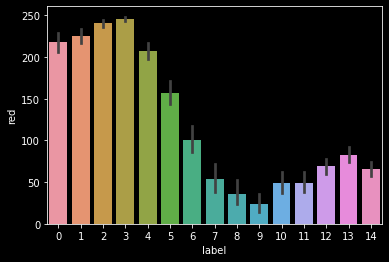

In [7]:
sns.barplot('label','red',data=dataset)

In [8]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


blue     0
green    0
red      0
label    0
dtype: int64

In [9]:
dataset.corr()

,blue,green,red,label
blue,1.000000,-0.323993,-0.667577,0.777602
green,-0.323993,1.000000,0.107181,-0.281357
red,-0.667577,0.107181,1.000000,-0.751137
label,0.777602,-0.281357,-0.751137,1.000000


In [10]:
dataset.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


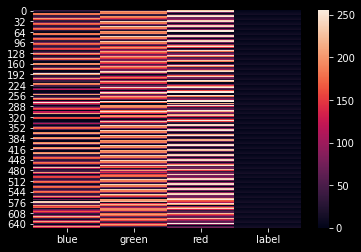

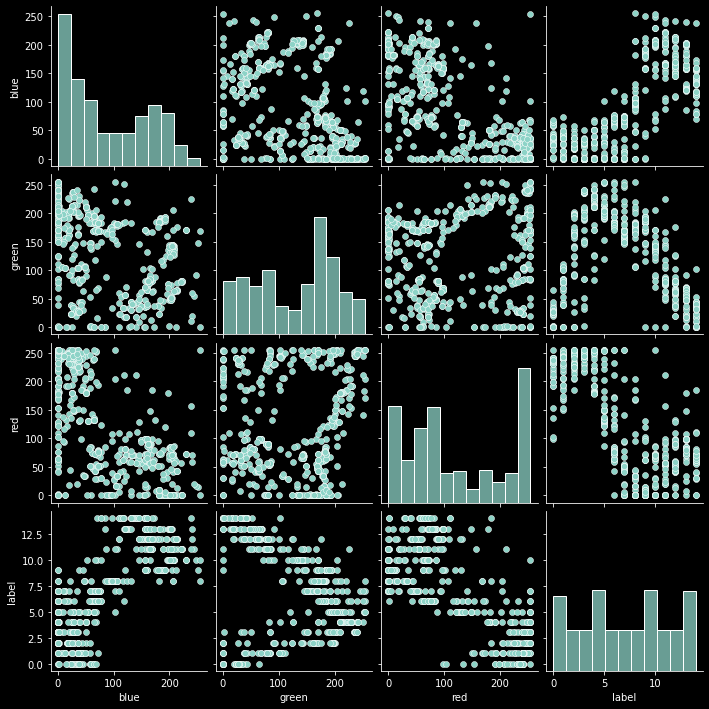

In [11]:
sns.heatmap(dataset)
sns.pairplot(dataset)

In [12]:
x = dataset.iloc[:,:-1].values
x

array([[ 36,  27, 231],
       [ 36,  84, 250],
       [ 37, 164, 255],
       ...,
       [169,  62,  48],
       [173,  37,  79],
       [131,   2,  77]], dtype=int64)

In [13]:
y = dataset.iloc[:,-1].values
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14,  0,  1

In [14]:
SC = StandardScaler()
x[:,:] = SC.fit_transform(x[:,:])

In [15]:
data_x = pd.DataFrame(x,columns=['blue','green','red'])
data_x

,blue,green,red
0,0,-1,1
1,0,0,1
2,0,0,1
3,0,1,1
4,0,1,1
...,...,...,...
648,1,0,-1
649,1,-1,0
650,1,0,0
651,1,-1,0


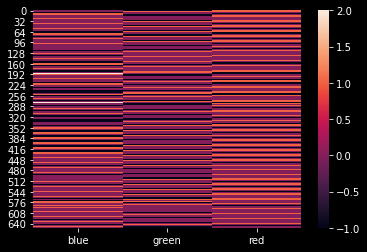

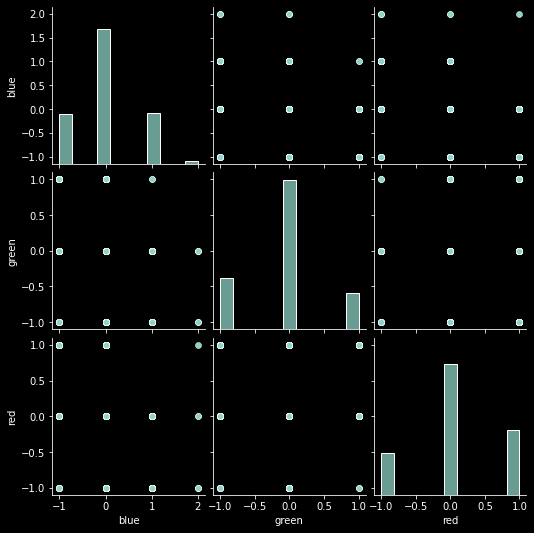

In [16]:
sns.heatmap(data_x)
sns.pairplot(data_x)

In [17]:
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 ,random_state = 0)

In [18]:
x_train

array([[-1,  1,  1],
       [-1,  0,  0],
       [ 0, -1,  0],
       ...,
       [ 1, -1,  0],
       [-1,  0,  0],
       [ 1,  0,  0]], dtype=int64)

In [19]:
x_test

array([[ 0,  0,  1],
       [-1,  0,  1],
       [ 0, -1,  0],
       [-1,  1,  0],
       [ 1,  0,  0],
       [ 0,  0, -1],
       [ 0,  0, -1],
       [ 1,  0,  0],
       [-1,  0,  1],
       [ 0,  0,  0],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [-1,  1,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0, -1,  1],
       [ 1,  0,  0],
       [ 0,  0,  0],
       [ 1,  0, -1],
       [ 0,  0, -1],
       [ 1, -1,  0],
       [ 0,  1, -1],
       [ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0, -1],
       [-1,  0,  1],
       [-1,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 1,  0, -1],
       [-1,  0,  1],
       [ 1,  0,  0],
       [ 0,  0,  1],
       [ 1, -1,  0],
       [ 0, -1,  0],
       [ 1, -1,  0],
       [ 1,  0,  0],
       [-1,  0, -1],
       [ 1,  0, -1],
       [ 0,  1,  0],
       [-1,  1,  1],
       [ 0,  1,  0],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 0, -1,  0],
       [-1,  0,  1],
       [-1,  0, -1],
       [ 0,  

In [20]:
y_train

array([ 6,  7, 14, 12,  4,  4,  9,  8,  6, 12,  4, 11,  9, 12,  1,  8, 14,
        3,  2,  7,  6,  3,  6,  8,  3,  0,  6,  9, 13,  2, 14, 13,  4, 14,
        9,  0,  0,  0,  3,  1, 14, 14, 11, 12,  2,  4, 10,  3, 10, 12,  3,
       11,  4,  7,  9,  7,  3,  2, 13,  9, 14, 10,  0,  8,  7, 10,  9,  4,
        0,  6, 12,  1,  0, 14,  6,  1,  7,  4,  1,  7,  4,  6, 11,  2,  0,
        7,  2,  9,  3,  0, 11, 11,  7, 12,  2,  3, 13,  4,  5, 11,  2, 13,
        1,  2, 10,  7, 14,  2,  9,  0,  4,  0, 11,  8,  3, 12,  9,  0, 13,
        8,  3,  0, 12,  7,  0,  7, 10,  5,  0, 13,  1,  5,  5,  4, 14,  6,
        0,  5,  7,  5,  5,  7,  4,  6, 11,  4,  3,  8,  7,  8, 10,  6,  0,
        4,  9,  0, 10,  2,  8,  9, 13, 11,  0, 12,  8, 10, 10, 14, 14,  9,
        5,  3,  8,  4, 11,  6,  8, 14, 14,  5,  5, 14,  3,  7,  6, 13, 14,
       10,  9,  6, 13, 13, 12,  6, 10, 11, 14, 14,  4,  9,  4,  5,  9,  5,
        7, 11,  1, 11, 10,  7,  0,  8,  1,  2,  3, 13, 11,  1,  8,  1,  6,
        3, 13,  1, 11,  5

In [21]:
y_test

array([ 1,  3, 14,  8, 10,  8,  7, 10,  3,  8, 11, 10,  6,  5,  1,  0, 11,
        6, 10,  8, 13, 10,  8,  2, 11,  3,  6,  5, 13,  9,  2, 10,  2, 13,
        0, 13, 12,  7, 10,  5,  4,  4,  9, 10, 14,  2,  9,  6,  1, 12,  5,
        1, 14,  1,  5,  6,  4,  1, 11,  7,  3,  2, 12,  6,  1,  3,  4,  0,
       10,  4, 11,  1, 12,  1, 13, 12,  2,  4,  2,  8, 12, 13,  5,  6, 13,
       12, 10,  7,  0, 14, 12,  4,  8, 10,  6,  2, 10, 12, 12, 13, 10,  7,
        7,  1,  7,  9, 13,  8,  4,  0,  2, 11,  8,  3,  1,  9,  1,  6,  2,
        2, 14,  0, 12,  4,  8, 11,  3, 13,  6,  8,  2], dtype=int64)

# SVC (Accuracy  = 64.3%)

In [22]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred_1 = svc.predict(x_test)
y_pred_1

array([ 2,  3, 14,  4, 11,  8,  8, 11,  3,  7, 11, 11,  4,  7,  7,  0, 11,
        7,  9,  8, 13,  7,  7,  2,  8,  3,  6,  7,  7,  9,  3, 11,  2, 13,
       14, 13, 11,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 11,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       11,  4,  7,  2, 11,  2, 14,  7,  2,  3,  2,  8,  7, 11,  4,  4,  9,
       11,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 11,  7, 11,  7, 11,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 11,  3,  8,  7,  2, 13,  7,  8,  0], dtype=int64)

In [23]:
print(r2_score(y_test, y_pred_1))

0.6429332873730507


In [24]:
df_comp_1 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_1})
df_comp_1

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,11
...,...,...
126,3,2
127,13,13
128,6,7
129,8,8


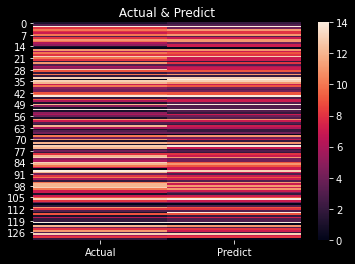

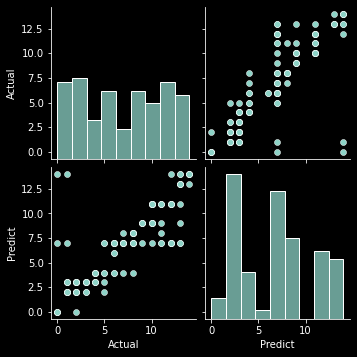

In [25]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_1)
sns.pairplot(df_comp_1)

# RandomForestRegressor ( Accuracy  = 70.8%)

In [26]:
RFR = RandomForestRegressor (random_state=12)
RFR.fit(x_train, y_train)
y_pred_2 = RFR.predict(x_test)
y_pred_2

array([ 1.84551269,  2.61692626, 11.59533792,  5.1529059 , 10.7562711 ,
        8.84138128,  8.84138128, 10.7562711 ,  2.61692626,  7.97360766,
       10.7562711 , 10.7562711 ,  5.1529059 ,  7.97360766,  7.97360766,
        0.62840577, 10.7562711 ,  7.97360766,  9.64941109,  8.84138128,
       12.69148452,  6.06533592,  7.97360766,  1.84551269,  8.84138128,
        2.61692626,  5.47269757,  7.97360766,  7.97360766,  9.64941109,
        2.61692626, 10.7562711 ,  1.84551269, 12.69148452, 11.59533792,
       12.69148452, 10.7562711 ,  6.86199155,  9.64941109,  4.61000873,
        3.93500475,  4.61000873,  9.64941109,  9.64941109, 11.59533792,
        2.61692626,  6.86199155,  7.97360766,  2.61692626, 11.59533792,
        3.55251999,  2.61692626, 11.59533792,  2.61692626,  1.84551269,
        7.97360766,  5.1529059 ,  2.61692626, 10.7562711 ,  7.97360766,
        3.55251999,  1.84551269,  7.97360766,  5.47269757,  1.84551269,
        1.84551269,  4.61000873,  0.62840577, 10.7562711 ,  4.61

In [27]:
print(r2_score(y_test, y_pred_2))

0.7077118884097364


In [28]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_2})
df_comp_2

,Actual,Predict
0,1,1.845513
1,3,2.616926
2,14,11.595338
3,8,5.152906
4,10,10.756271
...,...,...
126,3,2.068336
127,13,12.691485
128,6,7.973608
129,8,8.841381


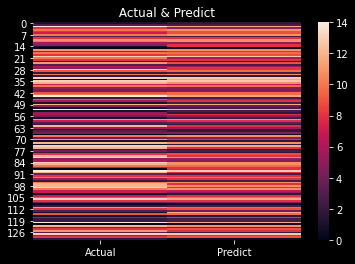

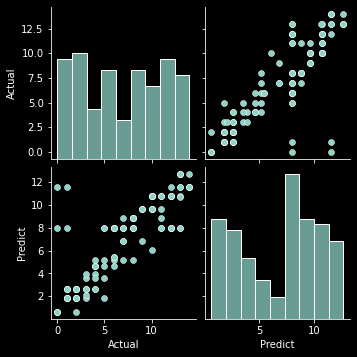

In [29]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_2)
sns.pairplot(df_comp_2)

# RandomForestClassifier ( Accuracy  = 63.6%)

In [30]:
RFC=RandomForestClassifier(n_estimators=1500,random_state=0)
RFC.fit(x_train,y_train)
y_pred_3 = RFC.predict(x_test)
y_pred_3

array([ 2,  3, 14,  4, 10,  8,  8, 10,  3,  7, 10, 10,  4,  7,  7,  0, 10,
        7,  9,  8, 13,  7,  7,  2,  8,  3,  6,  7,  7,  9,  3, 10,  2, 13,
       14, 13, 10,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 10,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       10,  4,  7,  2, 10,  2, 14,  7,  2,  3,  2,  8,  7, 10,  4,  4,  9,
       10,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 10,  7, 10,  7, 10,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 10,  3,  8,  7,  2, 13,  7,  8,  0], dtype=int64)

In [31]:
print(r2_score(y_test, y_pred_3))

0.6362435128976044


In [32]:
df_comp_3 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_3})
df_comp_3

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,10
...,...,...
126,3,2
127,13,13
128,6,7
129,8,8


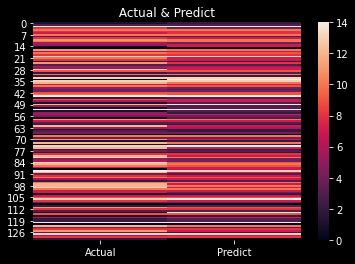

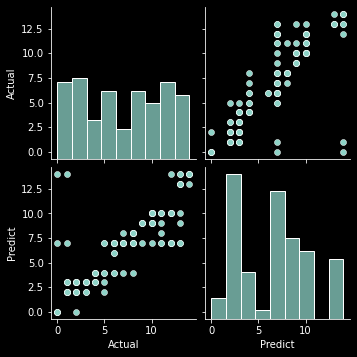

In [33]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_3)
sns.pairplot(df_comp_3)

# KNeighborsClassifier (Accuracy = 48.2%)

In [34]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred_4 = KNN.predict(x_test)
y_pred_4

array([ 2,  1, 14,  4, 11,  8,  8, 11,  1, 12, 11, 11,  4, 12, 12,  0, 11,
       12,  9,  8, 13,  7, 12,  2,  8,  1,  6, 12, 12,  9,  1, 11,  2, 13,
       14, 13, 11,  7,  9,  4,  3,  4,  9,  9, 14,  1,  7, 12,  1, 14,  3,
        1, 14,  1,  2, 12,  4,  1, 11, 12,  3,  2, 12,  6,  2,  2,  4,  0,
       11,  4, 12,  2, 11,  2, 14, 12,  2,  1,  2,  8, 12, 11,  4,  4, 13,
       11,  9, 12, 12, 13, 12,  1, 12,  9, 12,  1, 11, 12, 11, 12, 11,  7,
        4,  2, 12,  9, 14, 12,  4,  0,  1,  9,  8,  3, 14,  9,  2, 12,  1,
        1, 14,  0, 11,  3,  8, 12,  2, 13, 12,  8,  0], dtype=int64)

In [35]:
print(r2_score(y_test, y_pred_4))

0.4815424781529074


In [36]:
df_comp_4 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_4})
df_comp_4

,Actual,Predict
0,1,2
1,3,1
2,14,14
3,8,4
4,10,11
...,...,...
126,3,2
127,13,13
128,6,12
129,8,8


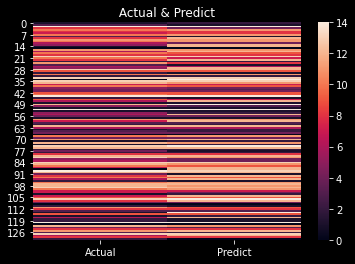

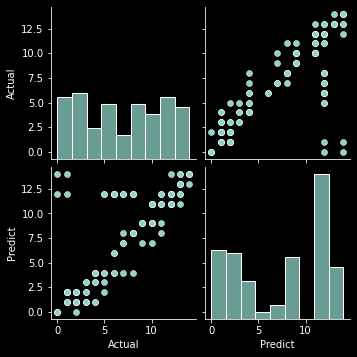

In [37]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_4)
sns.pairplot(df_comp_4)

# DecisionTreeClassifier (Accuracy = 63.6%)

In [38]:
DTC = DecisionTreeClassifier ()
DTC.fit(x_train,y_train)
y_pred_5 = DTC.predict(x_test)
y_pred_5

array([ 2,  3, 14,  4, 10,  8,  8, 10,  3,  7, 10, 10,  4,  7,  7,  0, 10,
        7,  9,  8, 13,  7,  7,  2,  8,  3,  6,  7,  7,  9,  3, 10,  2, 13,
       14, 13, 10,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 10,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       10,  4,  7,  2, 10,  2, 14,  7,  2,  3,  2,  8,  7, 10,  4,  4,  9,
       10,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 10,  7, 10,  7, 10,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 10,  3,  8,  7,  2, 13,  7,  8,  0], dtype=int64)

In [39]:
print(r2_score(y_test, y_pred_5))

0.6362435128976044


In [40]:
df_comp_5 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_5})
df_comp_5

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,10
...,...,...
126,3,2
127,13,13
128,6,7
129,8,8


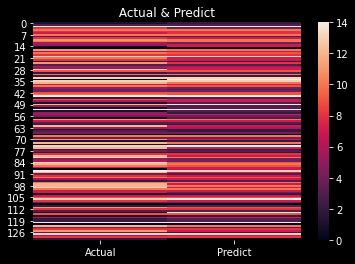

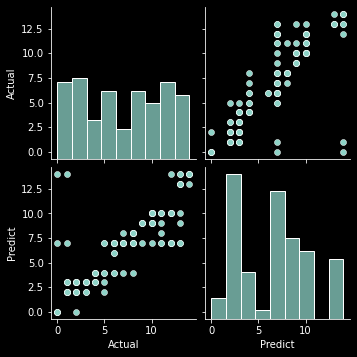

In [41]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_5)
sns.pairplot(df_comp_5)

# LogisticRegression (Accuracy = 64.8%)


In [42]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_6 = LR.predict(x_test)
y_pred_6

array([ 2,  3, 14,  4, 11,  8,  8, 11,  3,  7, 11, 11,  4,  7,  7,  0, 11,
        7,  9,  8, 13,  8,  7,  2,  8,  3,  6,  7,  7,  9,  3, 11,  2, 13,
       14, 13, 11,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 11,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       11,  4,  7,  2, 11,  2, 14,  7,  2,  3,  2,  8,  7, 11,  4,  4, 14,
       11,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 11,  7, 11,  7, 11,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 11,  3,  8,  7,  0, 13,  7,  8,  0], dtype=int64)

In [43]:
print(r2_score(y_test, y_pred_6))

0.6479506182296355


In [44]:
df_comp_6 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_6})
df_comp_6

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,11
...,...,...
126,3,0
127,13,13
128,6,7
129,8,8


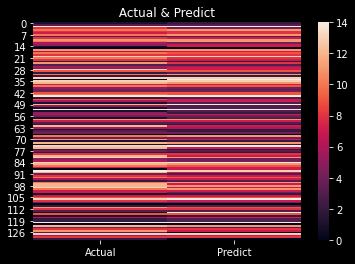

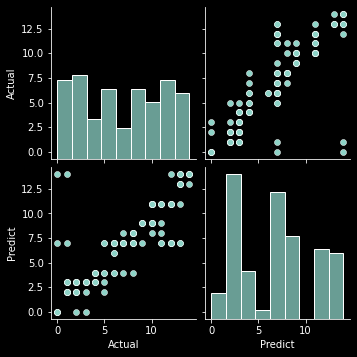

In [45]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_6)
sns.pairplot(df_comp_6)

# GradientBoostingClassifier (Accuracy = 64.3%)

In [46]:
GBC=GradientBoostingClassifier(n_estimators= 1000)
GBC.fit(x_train,y_train)
y_pred_7 = GBC.predict(x_test)
y_pred_7

array([ 2,  3, 14,  4, 11,  8,  8, 11,  3,  7, 11, 11,  4,  7,  7,  0, 11,
        7,  9,  8, 13,  7,  7,  2,  8,  3,  6,  7,  7,  9,  3, 11,  2, 13,
       14, 13, 11,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 11,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       11,  4,  7,  2, 11,  2, 14,  7,  2,  3,  2,  8,  7, 11,  4,  4,  9,
       11,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 11,  7, 11,  7, 11,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 11,  3,  8,  7,  2, 13,  7,  8,  0], dtype=int64)

In [47]:
print(r2_score(y_test, y_pred_7))

0.6429332873730507


In [48]:
df_comp_7 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_7})
df_comp_7

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,11
...,...,...
126,3,2
127,13,13
128,6,7
129,8,8


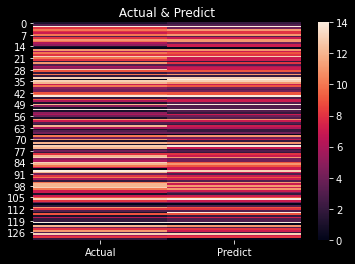

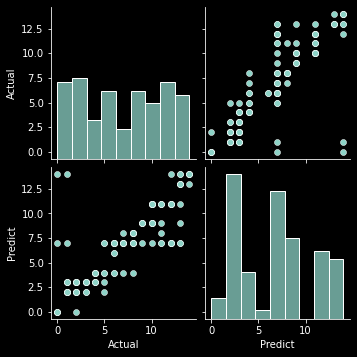

In [49]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_7)
sns.pairplot(df_comp_7)

# AdaBoostClassifier (Accuracy = 56.6%)

In [50]:
ABC=AdaBoostClassifier(n_estimators=100, random_state=0)
ABC.fit(x_train,y_train)
y_pred_8 = ABC.predict(x_test)
y_pred_8

array([ 3,  3, 11,  9,  9,  9,  9,  9,  3,  9,  9,  9,  9,  9,  9,  3,  9,
        9,  9,  9, 11,  9,  9,  3,  9,  3,  9,  9,  9,  9,  3,  9,  3, 11,
       11, 11,  9,  9,  9,  9,  3,  9,  9,  9, 11,  3,  9,  9,  3, 11,  3,
        3, 11,  3,  3,  9,  9,  3,  9,  9,  3,  3,  9,  9,  3,  3,  9,  3,
        9,  9,  9,  3,  9,  3, 11,  9,  3,  3,  3,  9,  9,  9,  9,  9, 11,
        9,  9,  9,  9, 11,  9,  3,  9,  9,  9,  3,  9,  9,  9,  9,  9,  9,
        9,  3,  9,  9, 11,  9,  9,  3,  3,  9,  9,  3, 11,  9,  3,  9,  3,
        3, 11,  3,  9,  3,  9,  9,  3, 11,  9,  9,  3], dtype=int64)

In [51]:
print(r2_score(y_test, y_pred_8))

0.566418991810133


In [52]:
df_comp_8 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_8})
df_comp_8

,Actual,Predict
0,1,3
1,3,3
2,14,11
3,8,9
4,10,9
...,...,...
126,3,3
127,13,11
128,6,9
129,8,9


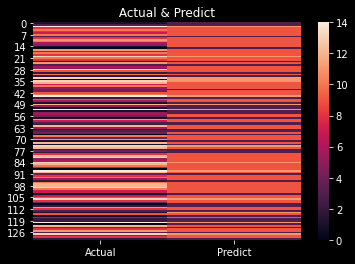

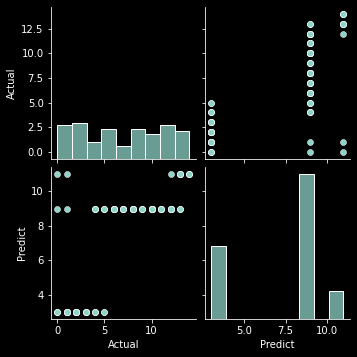

In [53]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_8)
sns.pairplot(df_comp_8)

# AdaBoostClassifier (Accuracy = 65.2%)

In [54]:
MLP =MLPClassifier ()
MLP.fit(x_train,y_train)
y_pred_9 = MLP.predict(x_test)
y_pred_9

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 2,  3, 14,  4, 11,  8,  8, 11,  3,  7, 11, 11,  4,  7,  7,  0, 11,
        7,  9,  8, 13,  8,  7,  2,  8,  3,  6,  7,  7,  9,  3, 11,  2, 13,
       14, 13, 11,  7,  9,  4,  3,  4,  9,  9, 14,  3,  7,  7,  3, 14,  3,
        3, 14,  3,  2,  7,  4,  3, 11,  7,  3,  2,  7,  6,  2,  2,  4,  0,
       11,  4,  7,  2, 11,  2, 14,  7,  2,  3,  2,  8,  7, 11,  4,  4, 13,
       11,  9,  7,  7, 13,  7,  3,  7,  9,  7,  3, 11,  7, 11,  7, 11,  7,
        4,  2,  7,  9, 14,  7,  4,  0,  3,  9,  8,  3, 14,  9,  2,  7,  3,
        3, 14,  0, 11,  3,  8,  7,  2, 13,  7,  8,  0], dtype=int64)

In [55]:
print(r2_score(y_test, y_pred_9))

0.651713616372074


In [56]:
df_comp_9 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_9})
df_comp_9

,Actual,Predict
0,1,2
1,3,3
2,14,14
3,8,4
4,10,11
...,...,...
126,3,2
127,13,13
128,6,7
129,8,8


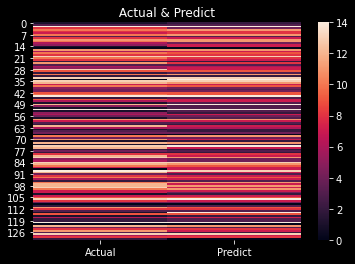

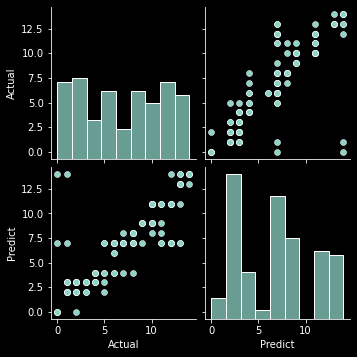

In [57]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp_9)
sns.pairplot(df_comp_9)